In [1]:
import sys
import os
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf
import flopy
from ipywidgets import interact

flopy is installed in C:\Users\LENOVO\miniconda3\lib\site-packages\flopy


In [2]:
# Directorio de trabajo:
model_ws= "../../Outputs/Resultados_Base/"
modelname= 'RUCM_Base'
exe_name= '../../Solver/mf2005.exe'
ml= flopy.modflow.Modflow.load(modelname+'.nam', exe_name=exe_name, model_ws=model_ws)

In [3]:
nper = ml.dis.nper # numero de periodos
nrow = ml.dis.nrow # numero de filas
ncol = ml.dis.ncol # numero de columnas

In [4]:
hds = bf.HeadFile(model_ws + '/' + modelname + '.hds')
head = hds.get_data(totim=31) #tiempo 1
head[head==-1e+30]=np.nan 
cpth = os.path.join(model_ws, modelname+'.cbc')
cobj = flopy.utils.CellBudgetFile(cpth, precision=hds.precision)

### **Elevacion del terreno** 

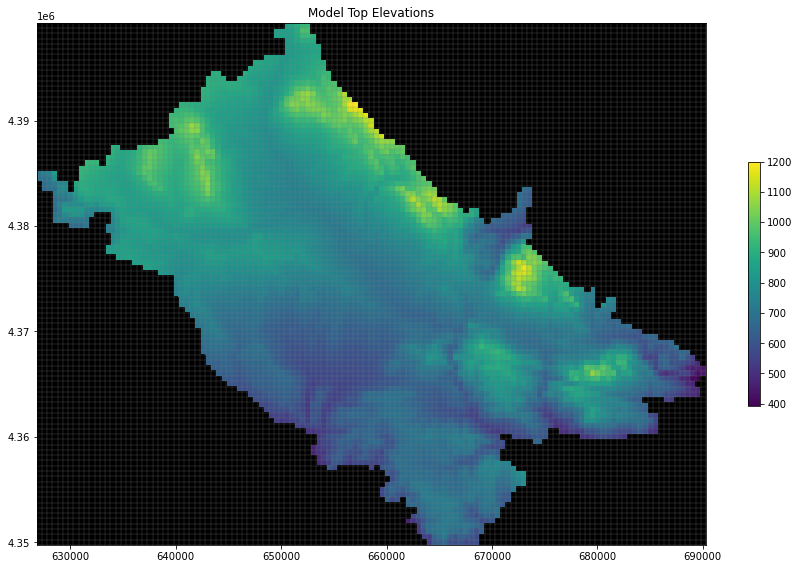

In [5]:
# Plot the model bottom array
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.set_title('Model Top Elevations')
modelmap = flopy.plot.PlotMapView(model=ml)
quadmesh = modelmap.plot_array(ml.dis.top.array, alpha=1.)
linecollection = modelmap.plot_grid(linewidth=0.25)
modelmap.plot_ibound()
cb = plt.colorbar(quadmesh, shrink=0.3)

### **Curvas hidroisohipsas** 

In [6]:
@interact(Capa=(0,2,1),Periodo=[i for i in range(nper)])
def f(Capa,Periodo):
    head=hds.get_data(kstpkper=(0,Periodo))
    head[head==-1e+30]=np.nan
    head[head==-999.99]=np.nan

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(1, 1, 1, aspect='equal')
    ax.set_title('Model Heads')
    mapview = flopy.plot.PlotMapView(model=ml,layer=Capa)
    quadmesh = mapview.plot_array(head, alpha= 1., masked_values=[-999.99, -1E+30])
    quadmesh2 = mapview.plot_ibound()
    levels = np.linspace(np.nanmin(head),np.nanmax(head),num=20)
    contour_set = mapview.contour_array(head, levels=levels, alpha=1., colors='white',
                                        masked_values=[-999.99, -1E+30])
    linecollection = mapview.plot_grid(linewidth=0.25)
    plt.clabel(contour_set, fmt='%2d', fontsize=10)
    plt.colorbar(quadmesh, shrink=0.3, format='%2.1f')
    plt.show() 

interactive(children=(IntSlider(value=1, description='Capa', max=2), Dropdown(description='Periodo', options=(…

### **Direccion del Flujo** 

In [7]:
@interact(Capa=(0,2,1),Periodo=[i for i in range(nper)])
def f(Capa,Periodo):
    head=hds.get_data(kstpkper=(0,Periodo))
    
    fname = os.path.join(model_ws, modelname+'.cbc')
    cbb = flopy.utils.CellBudgetFile(fname)
    frf = cbb.get_data(text='FLOW RIGHT FACE')[0]
    fff = cbb.get_data(text='FLOW FRONT FACE')[0]
    
    fig = plt.figure(figsize=(15, 15))

    ax = fig.add_subplot(1, 1, 1, aspect='equal')
    ax.set_title('Volumetric discharge (' + r'$L^3/T$' + ')')
    mapview = flopy.plot.PlotMapView(model=ml,layer=Capa)
    quadmesh = mapview.plot_ibound()
    contour_set = mapview.contour_array(head, masked_values=[-999.99])
    quiver = mapview.plot_discharge(frf, fff)
    linecollection = mapview.plot_grid(linewidth=0.5)
    plt.colorbar(contour_set, shrink=0.5)

interactive(children=(IntSlider(value=1, description='Capa', max=2), Dropdown(description='Periodo', options=(…

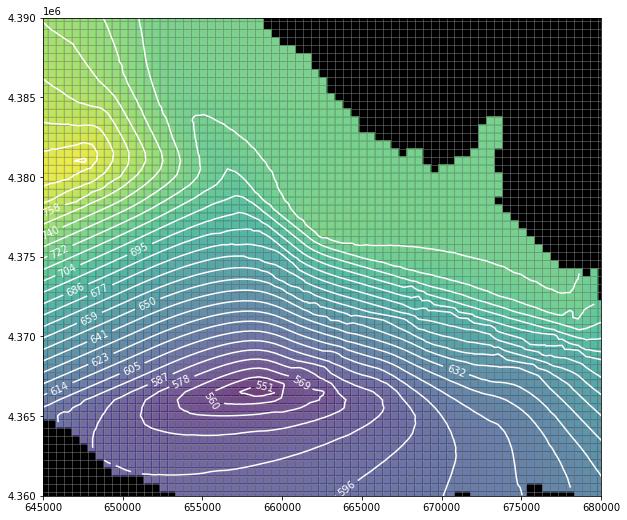

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(aspect='equal')
mapview = flopy.plot.PlotMapView(model=ml, ax=ax, extent=(645000,680000,4360000,4390000), 
                                 layer=2)
linecolletion = mapview.plot_grid(linewidth=0.5) 
mapview.plot_ibound()
mapview.plot_array(head, masked_values=[-999.99, -1E+30], alpha= 0.5)
levels = np.linspace(np.nanmin(head), np.nanmax(head), num=200)
c = mapview.contour_array(head, levels=levels, colors='white', masked_values=[-999.99, -1E+30])
plt.clabel(c, fmt='%3d')
plt.show()
plt.clf()

C:\Users\LENOVO\miniconda3\lib\site-packages\flopy\plot\crosssection.py:577: UserWarning: No contour levels were found within the data range.
  contour_set = self.ax.contour(xcentergrid, zcentergrid,


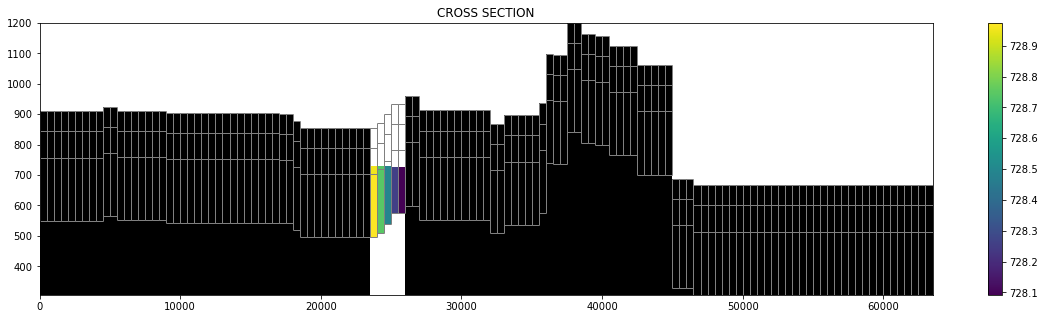

In [9]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)
levels = np.linspace(np.nanmin(head), np.nanmax(head), num=200)

# Next we create an instance of the ModelMap class
modelxsect = flopy.plot.PlotCrossSection(model=ml, line={'Row': 0})
contour_set = modelxsect.contour_array(head, masked_values=[-999.99,-1E+30], levels=levels, colors='white')
plt.clabel(contour_set, fmt='%0.1d', colors='white', fontsize=10) 

# Then we can use the plot_grid() method to draw the grid
# The return value for this function is a matplotlib LineCollection object,
# which could be manipulated (or used) later if necessary.
hv = modelxsect.plot_array(head, head=head, masked_values=[-999.99, -1E+30])
patches = modelxsect.plot_ibound(head=head)
linecollection = modelxsect.plot_grid(linewidth=1.)
actives = modelxsect.plot_ibound()

t = ax.set_title('CROSS SECTION')
fig.colorbar(hv, orientation='vertical', format='%2.1f')
plt.show()


In [10]:
@interact(Periodo=[i for i in range(nper)], Columna=[i for i in range(ncol)])
def f(Periodo,Columna):
    head=hds.get_data(kstpkper=(0,Periodo))  
    head[head==1e+30]=np.nan
    head[head==-999.99]=np.nan
    
    fig = plt.figure(figsize=(20,6))
    ax = fig.add_subplot(1, 1, 1)
    levels = np.linspace(np.nanmin(500), np.nanmax(head), num=30)

    modelxsect = flopy.plot.PlotCrossSection(model=ml, line={'Column': Columna})
    contour_set = modelxsect.contour_array(head, masked_values=[-999.99,-1E+30], levels=levels,colors='white')
    plt.clabel(contour_set, fmt='%1.f', colors='white', fontsize=10) 

    hv = modelxsect.plot_array(head, head=head, masked_values=[-999.99, -1E+30])
    patches = modelxsect.plot_ibound(head=head)
    linecollection = modelxsect.plot_grid(linewidth=1.)
    actives = modelxsect.plot_ibound()
    wt = modelxsect.plot_surface(head[2], masked_values=[-999.99,-1e+30], color='blue', lw=1.5)

    t = ax.set_title('CROSS SECTION')
    fig.colorbar(hv, orientation='vertical', format='%2.1f',shrink=0.75)
    #plt.show()

interactive(children=(Dropdown(description='Periodo', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

### **Cross Section - Columna** 

In [11]:
@interact(Periodo=[i for i in range(nper)], Columna=[i for i in range(ncol)])
def f(Periodo,Columna):
    head=hds.get_data(kstpkper=(0,Periodo))  
    head[head==1e+30]=np.nan
    head[head==-999.99]=np.nan
    
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(1, 1, 1)   
    xsect = flopy.plot.PlotCrossSection(model=ml, line={'Column':Columna})

    pc = xsect.plot_array(head, head=head, alpha=1, masked_values=[999.99,-1e+30])
    patches = xsect.plot_ibound(head=head)
    #patches = xsect.plot_bc('GHB', head=head, color='red')
    linecollection = xsect.plot_grid(linewidth=1.)
    wt = xsect.plot_surface(head[2], masked_values=[999.,-1e+30], color='blue', lw=1.5)
    actives = xsect.plot_ibound()
    cb = plt.colorbar(pc, shrink=0.75)

interactive(children=(Dropdown(description='Periodo', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

### **Cross Section - Fila** 

In [12]:
@interact(Periodo=[i for i in range(nper)], Fila=[i for i in range(nrow)])
def f(Periodo,Fila):
    head=hds.get_data(kstpkper=(0,Periodo))  
    head[head==1e+30]=np.nan
    head[head==-999.99]=np.nan
    
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(1, 1, 1)   
    xsect = flopy.plot.PlotCrossSection(model=ml, line={'Row':Fila})

    pc = xsect.plot_array(head, head=head, alpha=1, masked_values=[999.99,-1e+30])
    patches = xsect.plot_ibound(head=head)
    patches = xsect.plot_bc('RIV', color='red')
    linecollection = xsect.plot_grid(linewidth=1.)
    wt = xsect.plot_surface(head[2], masked_values=[999.,-1e+30], color='blue', lw=1.5)
    actives = xsect.plot_ibound()
    cb = plt.colorbar(pc, shrink=0.75)

interactive(children=(Dropdown(description='Periodo', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

### **DISCRETIZACION ESPACIAL - Horizontal** 

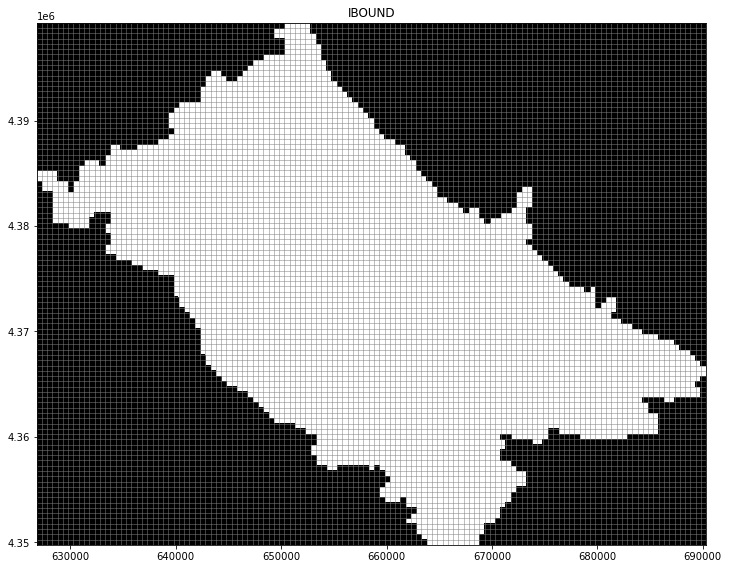

In [13]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml, ax=ax)
actives = modelmap.plot_ibound()
linecollection = modelmap.plot_grid(linewidth=0.5)
t = ax.set_title('IBOUND')

### **DISCRETIZACION ESPACIAL - Vertical** 

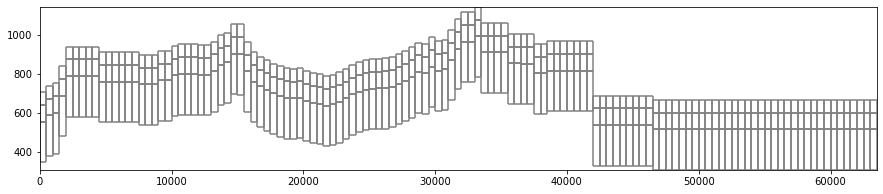

In [14]:
fig, ax = plt.subplots(figsize=(15,3))
modelxsect = flopy.plot.PlotCrossSection(model=ml, line={'Row':20})
linecollection = modelxsect.plot_grid()

### **GHB** 

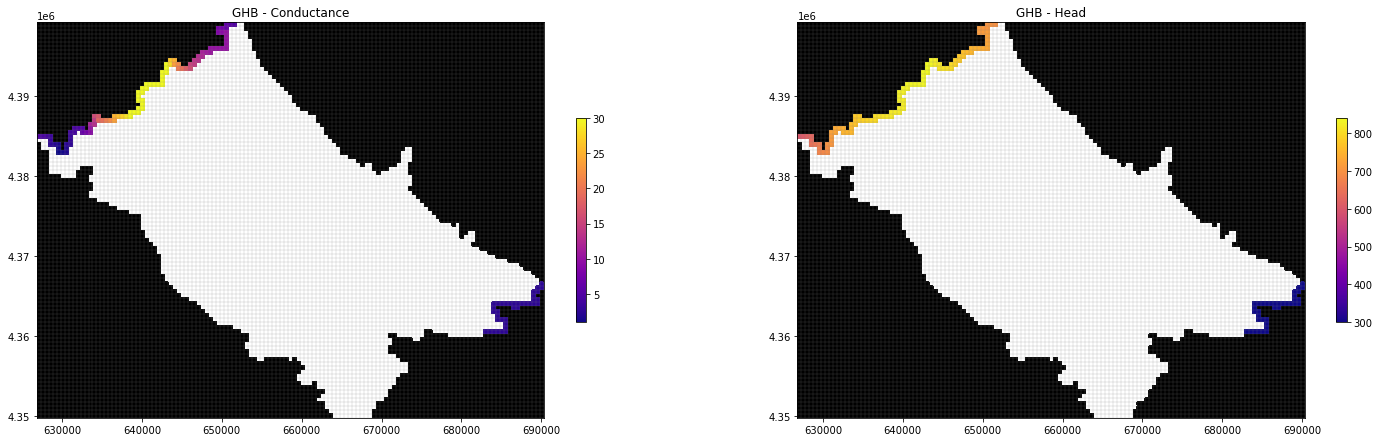

In [15]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(1,2,1, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml, ax=ax)
actives = modelmap.plot_ibound()
quadmesh = modelmap.plot_array(ml.ghb.stress_period_data.array['cond'][-1,0,:,:], 
                               cmap='plasma',ax=ax, alpha=1)
linecollection = modelmap.plot_grid(linewidth=0.2)
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('GHB - Conductance')


ax = fig.add_subplot(1,2,2, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml, ax=ax)
actives = modelmap.plot_ibound()
quadmesh = modelmap.plot_array(ml.ghb.stress_period_data.array['bhead'][-1,0,:,:], 
                               cmap='plasma',ax=ax, alpha=1)
linecollection = modelmap.plot_grid(linewidth=0.2)
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('GHB - Head')

### **RIVER** 

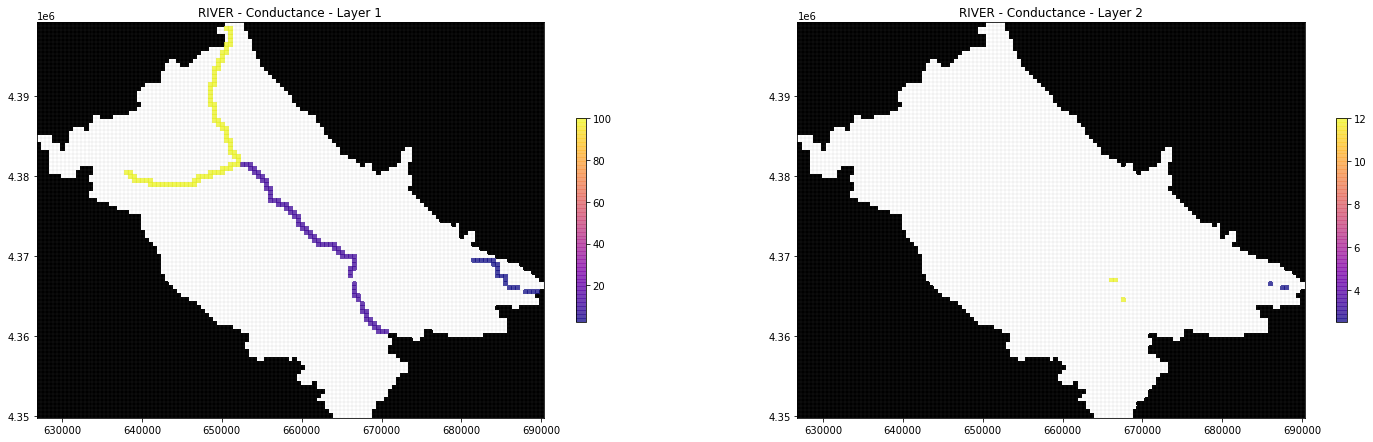

In [16]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(1, 2, 1, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml)
actives = modelmap.plot_ibound()
linecollection = modelmap.plot_grid(linewidth=0.1)
quadmesh = modelmap.plot_array(ml.riv.stress_period_data.array['cond'][-1,0,:,:], cmap='plasma',ax=ax, alpha=0.5)
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('RIVER - Conductance - Layer 1')

ax = fig.add_subplot(1, 2, 2, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml)
actives = modelmap.plot_ibound()
linecollection = modelmap.plot_grid(linewidth=0.1)
quadmesh = modelmap.plot_array(ml.riv.stress_period_data.array['cond'][-1,1,:,:], cmap='plasma',ax=ax, alpha=0.5)
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('RIVER - Conductance - Layer 2')

### **Conductividad Hidráulica** 

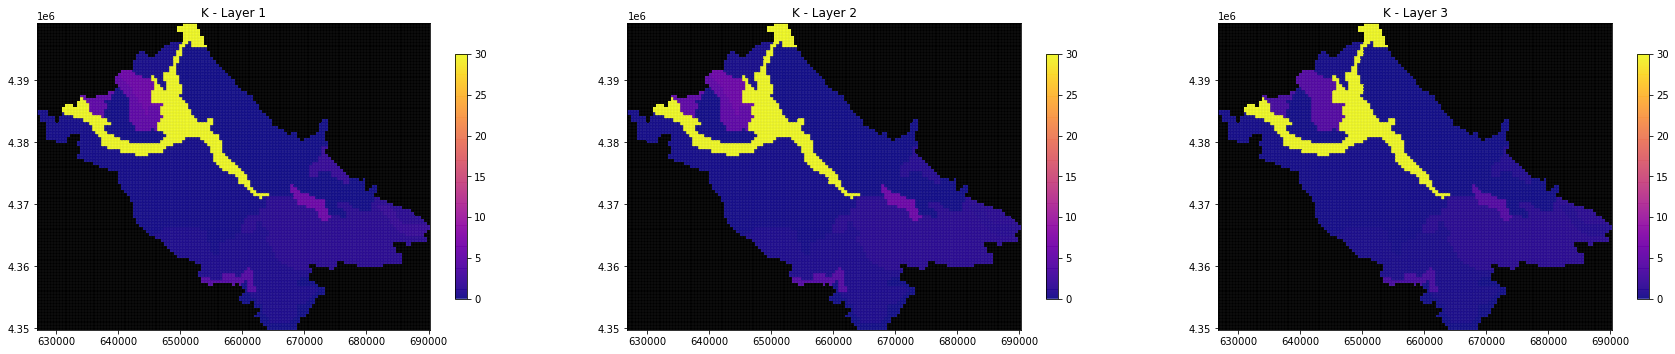

In [17]:
fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(1, 3, 1, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml)
linecollection = modelmap.plot_grid(linewidth=0.1)
quadmesh = modelmap.plot_array(ml.lpf.hk.array[0,:,:],cmap='plasma',ax=ax, alpha=0.75)
actives = modelmap.plot_ibound()
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('K - Layer 1')

ax = fig.add_subplot(1, 3, 2, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml)
linecollection = modelmap.plot_grid(linewidth=0.1)
quadmesh = modelmap.plot_array(ml.lpf.hk.array[1,:,:],cmap='plasma',ax=ax, alpha=0.75)
actives = modelmap.plot_ibound()
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('K - Layer 2')

ax = fig.add_subplot(1, 3, 3, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml)
linecollection = modelmap.plot_grid(linewidth=0.1)
quadmesh = modelmap.plot_array(ml.lpf.hk.array[2,:,:],cmap='plasma',ax=ax, alpha=0.75)
actives = modelmap.plot_ibound()
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('K - Layer 3')

### **Almacenamiento Especifico** 

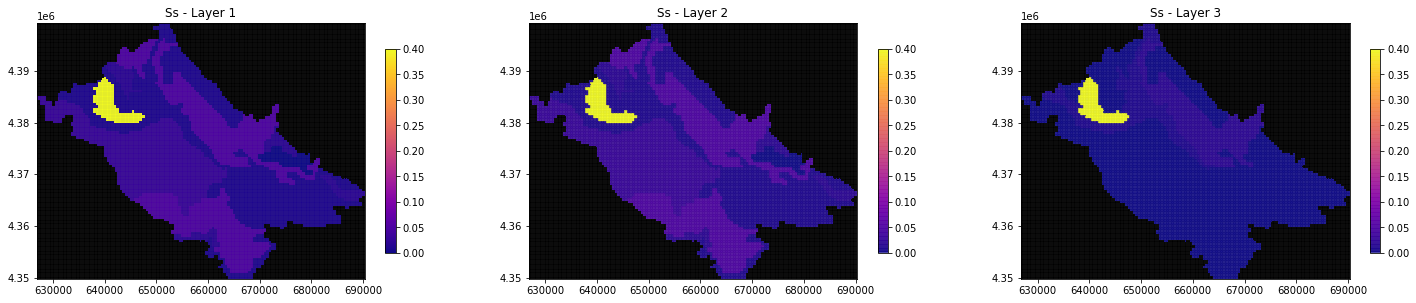

In [18]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(1, 3, 1, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml)
linecollection = modelmap.plot_grid(linewidth=0.1)
quadmesh = modelmap.plot_array(ml.lpf.ss.array[0,:,:],cmap='plasma',ax=ax, alpha=1.)
actives = modelmap.plot_ibound()
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('Ss - Layer 1')

ax = fig.add_subplot(1, 3, 2, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml)
linecollection = modelmap.plot_grid(linewidth=0.1)
quadmesh = modelmap.plot_array(ml.lpf.ss.array[1,:,:],cmap='plasma',ax=ax, alpha=0.75)
actives = modelmap.plot_ibound()
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('Ss - Layer 2')

ax = fig.add_subplot(1, 3, 3, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml)
linecollection = modelmap.plot_grid(linewidth=0.1)
quadmesh = modelmap.plot_array(ml.lpf.ss.array[2,:,:],cmap='plasma',ax=ax, alpha=0.75)
actives = modelmap.plot_ibound()
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('Ss - Layer 3')

### **Rendimiento Especifico** 

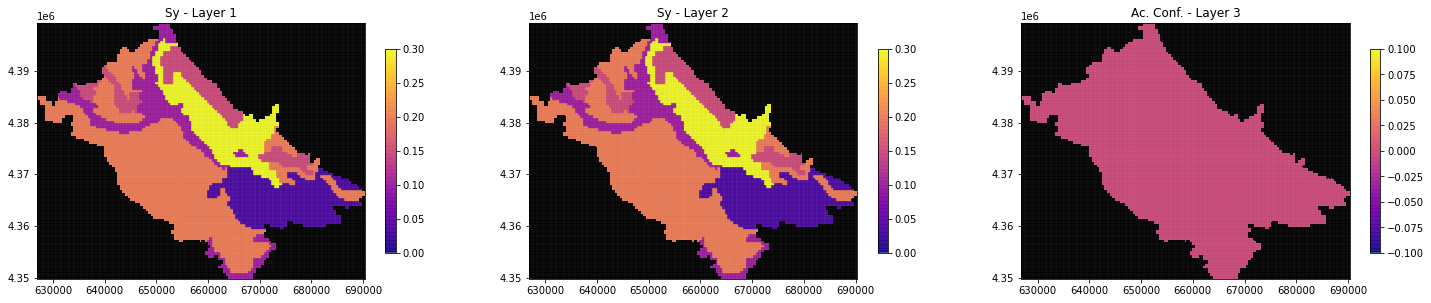

In [19]:
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(1, 3, 1, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml)
linecollection = modelmap.plot_grid(linewidth=0.1)
quadmesh = modelmap.plot_array(ml.lpf.sy.array[0,:,:],cmap='plasma',ax=ax, alpha=0.75)
actives = modelmap.plot_ibound()
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('Sy - Layer 1')

ax = fig.add_subplot(1, 3, 2, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml)
linecollection = modelmap.plot_grid(linewidth=0.1)
quadmesh = modelmap.plot_array(ml.lpf.sy.array[1,:,:],cmap='plasma',ax=ax, alpha=0.75)
actives = modelmap.plot_ibound()
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('Sy - Layer 2')

ax = fig.add_subplot(1, 3, 3, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=ml)
linecollection = modelmap.plot_grid(linewidth=0.1)
quadmesh = modelmap.plot_array(ml.lpf.sy.array[2,:,:],cmap='plasma',ax=ax, alpha=0.75)
actives = modelmap.plot_ibound()
plt.colorbar(quadmesh, shrink=0.15)
t = ax.set_title('Ac. Conf. - Layer 3')

### **RIV, WEL, GHB** 

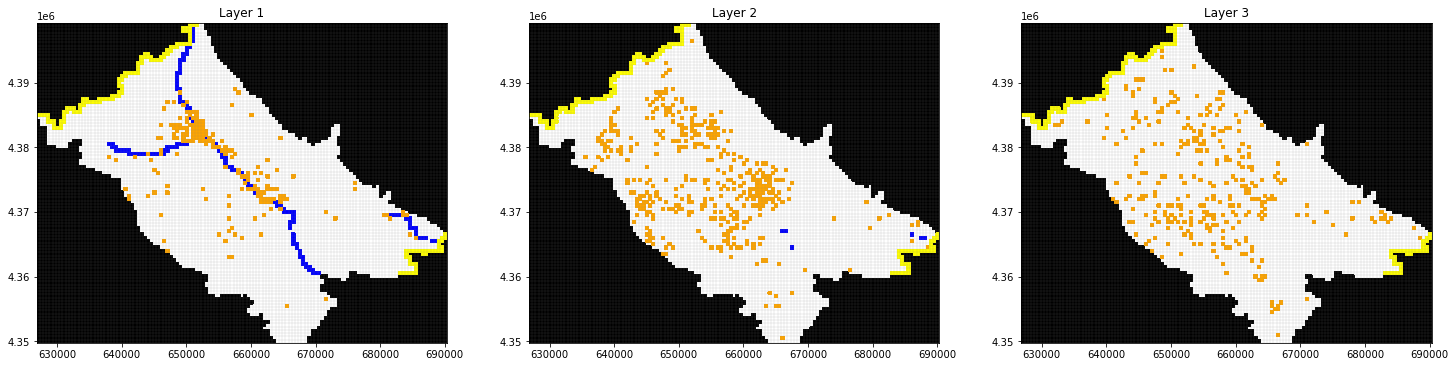

In [20]:
fig = plt.figure(figsize=(25, 25))

ax = fig.add_subplot(1, 3, 1, aspect='equal')
mapview = flopy.plot.PlotMapView(model=ml, layer=0)
quadmesh = mapview.plot_ibound()
quadmesh = mapview.plot_bc('RIV', color='blue')
quadmesh = mapview.plot_bc('WEL', color='orange')
quadmesh = mapview.plot_bc('GHB', color='yellow')
linecollection = mapview.plot_grid(linewidth=0.15)
t = ax.set_title('Layer 1')

ax = fig.add_subplot(1, 3, 2, aspect='equal')
mapview = flopy.plot.PlotMapView(model=ml, layer=1)
quadmesh = mapview.plot_ibound()
quadmesh = mapview.plot_bc('RIV', color='blue')
quadmesh = mapview.plot_bc('WEL', color='orange')
quadmesh = mapview.plot_bc('GHB', color='yellow')
linecollection = mapview.plot_grid(linewidth=0.15)
t = ax.set_title('Layer 2')

ax = fig.add_subplot(1, 3, 3, aspect='equal')
mapview = flopy.plot.PlotMapView(model=ml, layer=2)
quadmesh = mapview.plot_ibound()
quadmesh = mapview.plot_bc('RIV', color='blue')
quadmesh = mapview.plot_bc('WEL', color='orange')
quadmesh = mapview.plot_bc('GHB', color='yellow')
linecollection = mapview.plot_grid(linewidth=0.15)
t = ax.set_title('Layer 3')